<h1> HubMap - Hacking the Kidney </h1>
<h3> Goal - Mapping the human body at function tissue unit level - detect cyrpt FTUs in colon </h3>

Implementation of Kaggle Notebook - Innovation Prize Winner - Deep Flash2 <br>
Description - Convert anatomical structure segmentations from json to masks (.zarr files) and downscale images and masks for train and test data. <br>
Input - train.csv (csv file containing rle format mask), sample_submission (csv file containing names of test images), images (train and test images) <br>
Output - image_scale2 folder - resized images. <br>

<b>How to use?</b><br> 
Change the basepath to where your data lives and you're good to go. <br>

<b>How to reproduce on a different dataset?</b><br>
Create a train and test folders of the dataset containing train images and masks and test images and masks respectively. Have a train.csv with the rle for train images and a sample-submission file with test image names.

Link to the original notebook - https://www.kaggle.com/matjes/hubmap-zarr <hr>


<h6> Step 1 - Import useful libraries<h6>

In [5]:
import cv2, zarr, tifffile
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from pathlib import Path

In [6]:
def read_image(image_id, path, scale=None, verbose=1):
    "Load images with ID from path" 
    try: 
        image = tifffile.imread(path/f"train/{image_id}.tiff")
    except:
        image = tifffile.imread(path/f"test/{image_id}.tiff")
    
    if len(image.shape) == 5:
        image = image.squeeze().transpose(1, 2, 0)
    elif image.shape[0] == 3:
        image = image.transpose(1, 2, 0)
    
    if verbose:
        print(f"[{image_id}] Image shape: {image.shape}")
    
    if scale:
        new_size = (image.shape[1] // scale, image.shape[0] // scale)
        image = cv2.resize(image, new_size)
        
        if verbose:
            print(f"[{image_id}] Resized Image shape: {image.shape}")
        
    return image

<h6> Step 2 - Set paths for the files needed </h6>

In [10]:
scale = 2

basepath = Path(r'C:/Users/soodn/Downloads/Naveksha/Kaggle HuBMAP/Data/colon-data-reprocessed')
df_train = pd.read_csv(basepath/"train.csv")
df_sample = pd.read_csv(basepath/"sample_submission.csv")
g_out = zarr.group(f'output_colon/images_scale{scale}')

In [11]:
df_sample = df_sample.rename(columns={"predicted":"encoding"})
df_train = df_train[df_train.id != 'HandE_B005_CL_b_RGB_topright']

<h6> Step 3 - Rescale the images, and save the rescaled images to a folder </h6>

[CL_HandE_1234_B004_bottomleft] Image shape: (4536, 4704, 3)
[CL_HandE_1234_B004_bottomleft] Resized Image shape: (2268, 2352, 3)
Name               : /CL_HandE_1234_B004_bottomleft
Type               : zarr.core.Array
Data type          : uint8
Shape              : (2268, 2352, 3)
Chunk shape        : (567, 588, 2)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 16003008 (15.3M)
No. bytes stored   : 14541802 (13.9M)
Storage ratio      : 1.1
Chunks initialized : 32/32



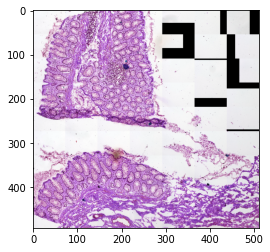

[HandE_B005_CL_b_RGB_bottomleft] Image shape: (4536, 4704, 3)
[HandE_B005_CL_b_RGB_bottomleft] Resized Image shape: (2268, 2352, 3)
Name               : /HandE_B005_CL_b_RGB_bottomleft
Type               : zarr.core.Array
Data type          : uint8
Shape              : (2268, 2352, 3)
Chunk shape        : (567, 588, 2)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 16003008 (15.3M)
No. bytes stored   : 14896206 (14.2M)
Storage ratio      : 1.1
Chunks initialized : 32/32



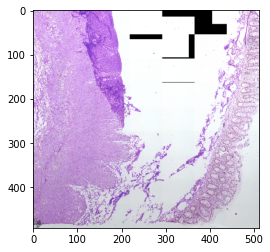

[CL_HandE_1234_B004_bottomright] Image shape: (4536, 4704, 3)
[CL_HandE_1234_B004_bottomright] Resized Image shape: (2268, 2352, 3)
Name               : /CL_HandE_1234_B004_bottomright
Type               : zarr.core.Array
Data type          : uint8
Shape              : (2268, 2352, 3)
Chunk shape        : (567, 588, 2)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 16003008 (15.3M)
No. bytes stored   : 17743336 (16.9M)
Storage ratio      : 0.9
Chunks initialized : 32/32



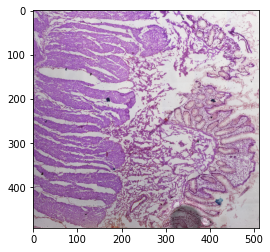

[CL_HandE_1234_B004_topleft] Image shape: (4536, 4704, 3)
[CL_HandE_1234_B004_topleft] Resized Image shape: (2268, 2352, 3)
Name               : /CL_HandE_1234_B004_topleft
Type               : zarr.core.Array
Data type          : uint8
Shape              : (2268, 2352, 3)
Chunk shape        : (567, 588, 2)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 16003008 (15.3M)
No. bytes stored   : 17003845 (16.2M)
Storage ratio      : 0.9
Chunks initialized : 32/32



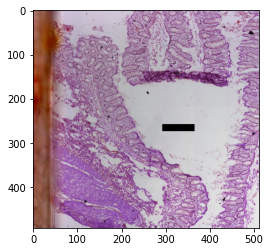

[CL_HandE_1234_B004_topright] Image shape: (4536, 4704, 3)
[CL_HandE_1234_B004_topright] Resized Image shape: (2268, 2352, 3)
Name               : /CL_HandE_1234_B004_topright
Type               : zarr.core.Array
Data type          : uint8
Shape              : (2268, 2352, 3)
Chunk shape        : (567, 588, 2)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 16003008 (15.3M)
No. bytes stored   : 13461786 (12.8M)
Storage ratio      : 1.2
Chunks initialized : 32/32



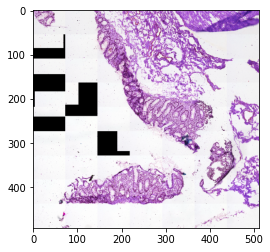

[HandE_B005_CL_b_RGB_bottomright] Image shape: (4536, 4704, 3)
[HandE_B005_CL_b_RGB_bottomright] Resized Image shape: (2268, 2352, 3)
Name               : /HandE_B005_CL_b_RGB_bottomright
Type               : zarr.core.Array
Data type          : uint8
Shape              : (2268, 2352, 3)
Chunk shape        : (567, 588, 2)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 16003008 (15.3M)
No. bytes stored   : 11444384 (10.9M)
Storage ratio      : 1.4
Chunks initialized : 32/32



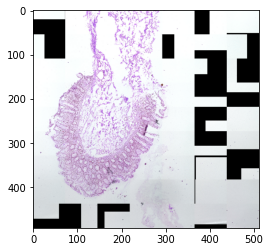

[HandE_B005_CL_b_RGB_topleft] Image shape: (4536, 4704, 3)
[HandE_B005_CL_b_RGB_topleft] Resized Image shape: (2268, 2352, 3)
Name               : /HandE_B005_CL_b_RGB_topleft
Type               : zarr.core.Array
Data type          : uint8
Shape              : (2268, 2352, 3)
Chunk shape        : (567, 588, 2)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 16003008 (15.3M)
No. bytes stored   : 15427467 (14.7M)
Storage ratio      : 1.0
Chunks initialized : 32/32



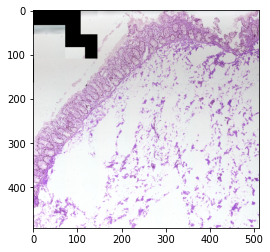

In [13]:
for idx in df_sample['id'].tolist()+df_train['id'].tolist():
    img = read_image(idx, basepath, scale=scale)
    g_out[idx] = img
    print(g_out[idx].info)
    shape = g_out[idx].shape
    
    plt.imshow(cv2.resize(img, dsize=(512, 512*shape[0]//shape[1])))
    plt.show()